In [1]:
import keras 
import numpy as np 
from lammps import read_traj
from lammps import read_bop

2025-04-11 19:13:39.603024: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 19:13:39.615969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744391619.630581 1758218 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744391619.635110 1758218 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744391619.646997 1758218 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
from sklearn.manifold import TSNE

Natoms, Config, Box = read_traj("dense_liquid/1st_NN_cutoff_1.5/trajectory.lammpstrj")
BOP_fluid = read_bop("dense_liquid/1st_NN_cutoff_1.5/steinhardt.dat",Natoms)

Natoms, Config, Box = read_traj("quickanddirty_freeze/1st_NN_cutoff_1.5/trajectory.lammpstrj")
BOP_solid = read_bop("quickanddirty_freeze/1st_NN_cutoff_1.5/steinhardt.dat",Natoms)


x_train=[]
for ti in range(0, 30):
    for id in range(len(BOP_solid[ti])):
        x_train.append(BOP_solid[ti][id][1:])

for ti in range(60, 90):
    for id in range(len(BOP_fluid[ti])):
        x_train.append(BOP_fluid[ti][id][1:])

x_test=[]
for ti in range(30,40):
    for id in range(len(BOP_solid[ti])):
        x_test.append(BOP_solid[ti][id][1:])

for ti in range(90,100):
    for id in range(len(BOP_fluid[ti])):
        x_test.append(BOP_fluid[ti][id][1:])

x_train = np.array(x_train)
x_test = np.array(x_test)



X_embedded = TSNE(n_components=2, learning_rate='auto',

                  init='random', perplexity=3).fit_transform(x_train)

X_embedded.shape

(60000, 2)

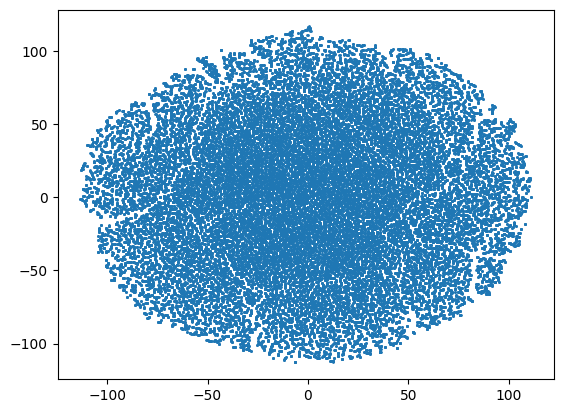

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=1)

## Keras template example: Autoencoder with MNIST 

In [4]:

import keras
from keras import layers

''' 
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

'''

' \n# This is the size of our encoded representations\nencoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats\n\n# This is our input image\ninput_img = keras.Input(shape=(784,))\n# "encoded" is the encoded representation of the input\nencoded = layers.Dense(encoding_dim, activation=\'relu\')(input_img)\n# "decoded" is the lossy reconstruction of the input\ndecoded = layers.Dense(784, activation=\'sigmoid\')(encoded)\n\n# This model maps an input to its reconstruction\nautoencoder = keras.Model(input_img, decoded)\n\n\n# This model maps an input to its encoded representation\nencoder = keras.Model(input_img, encoded)\n\n\n# This is our encoded (32-dimensional) input\nencoded_input = keras.Input(shape=(encoding_dim,))\n# Retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# Create the decoder model\ndecoder = keras.Model(encoded_input, decoder_layer(encoded_input))\nautoencoder.compile(optimizer=\'adam\', loss=

In [5]:
import keras
from keras import layers

def autoencoder(encoding_dim,input_dim,x_test,x_train):

    # This is our input image
    input_img = keras.Input(shape=(input_dim,))
    # "encoded" is the encoded representation of the input
    encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    # This model maps an input to its reconstruction
    autoencoder = keras.Model(input_img, decoded)


    # This model maps an input to its encoded representation
    encoder = keras.Model(input_img, encoded)


    # This is our encoded (32-dimensional) input
    encoded_input = keras.Input(shape=(encoding_dim,))
    # Retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # Create the decoder model
    decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    
    autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))

    # Encode and decode some digits
    # Note that we take them from the *test* set
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)


    return encoded_imgs, decoded_imgs 


# 

## Autoencoder for LJ crystallisation with liquid and solid Q1-Q8 with first neighbouring shell 

In [20]:

import numpy as np 
from lammps import read_traj
from lammps import read_bop

Natoms, Config, Box = read_traj("dense_liquid/1st_NN_cutoff_1.5/trajectory.lammpstrj")
BOP_fluid = read_bop("dense_liquid/1st_NN_cutoff_1.5/steinhardt.dat",Natoms)

Natoms, Config, Box = read_traj("quickanddirty_freeze/1st_NN_cutoff_1.5/trajectory.lammpstrj")
BOP_solid = read_bop("quickanddirty_freeze/1st_NN_cutoff_1.5/steinhardt.dat",Natoms)


x_train=[]
for ti in range(0, 30):
    for id in range(len(BOP_solid[ti])):
        x_train.append(BOP_solid[ti][id][1:])

for ti in range(0, 30):
    for id in range(len(BOP_fluid[ti])):
        x_train.append(BOP_fluid[ti][id][1:])

x_test=[]
for ti in range(30,60):
    for id in range(len(BOP_solid[ti])):
        x_test.append(BOP_solid[ti][id][1:])

for ti in range(30,60):
    for id in range(len(BOP_fluid[ti])):
        x_test.append(BOP_fluid[ti][id][1:])

x_train = np.array(x_train)
x_test = np.array(x_test)


print(x_train)
print(x_test)

encoded_imgs, decoded_imgs = autoencoder(3,8,x_test,x_train)



[[0.0577219 0.0532705 0.0822999 ... 0.262172  0.309625  0.348975 ]
 [0.0603473 0.0552507 0.0863564 ... 0.341029  0.209541  0.433574 ]
 [0.0598047 0.0626649 0.0457382 ... 0.298357  0.117284  0.461801 ]
 ...
 [0.159571  0.12952   0.212304  ... 0.323291  0.37044   0.278702 ]
 [0.106535  0.106303  0.0695061 ... 0.279243  0.422637  0.276881 ]
 [0.0798916 0.119584  0.123221  ... 0.395718  0.323328  0.330383 ]]
[[0.0451738 0.0807798 0.107506  ... 0.3149    0.297976  0.347832 ]
 [0.0177238 0.0139271 0.0291377 ... 0.257341  0.0927119 0.48898  ]
 [0.0523855 0.0334794 0.048552  ... 0.210451  0.216068  0.377221 ]
 ...
 [0.108745  0.0693658 0.0935441 ... 0.381049  0.345336  0.242569 ]
 [0.159578  0.0964896 0.115657  ... 0.265716  0.365848  0.311054 ]
 [0.176589  0.0875406 0.133846  ... 0.305321  0.379039  0.320141 ]]
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1052 - val_loss: 0.0462
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0304 - val_loss: 0.0083
Epoch 3/50


[[0.8538053  0.         1.2693081 ]
 [1.5171124  0.         1.0310853 ]
 [1.1373705  0.         1.2516426 ]
 ...
 [0.36173344 0.         1.0115888 ]
 [0.31054956 0.         1.1033894 ]
 [0.41376984 0.         1.1316986 ]]
(60000, 3)
60000


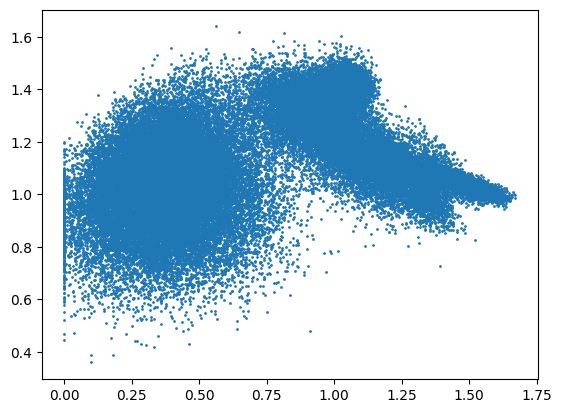

In [22]:
print(encoded_imgs)
print(encoded_imgs.shape)
print(len(encoded_imgs))
#plt.scatter(encoded_imgs[:,0]+np.random.rand(len(encoded_imgs[:,0])),encoded_imgs[:,1], s=1)
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,2], s=1)
plt.show()

(0.0, 0.5)

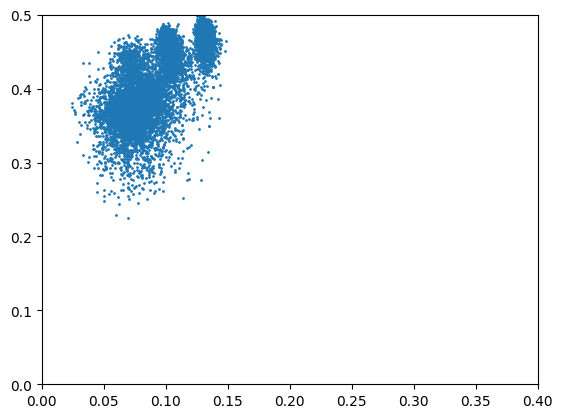

In [15]:
x_s=[]
for ti in range(30, 40):
    for id in range(len(BOP_solid[ti])):
        x_s.append(BOP_solid[ti][id][1:])

x_s = np.array(x_s)
plt.scatter(x_s[:,3],x_s[:,7], s=1)
plt.xlim((0,0.4))
plt.ylim((0,0.5))


[[0.0577219 0.0532705 0.0822999 ... 0.262172  0.309625  0.348975 ]
 [0.0603473 0.0552507 0.0863564 ... 0.341029  0.209541  0.433574 ]
 [0.0598047 0.0626649 0.0457382 ... 0.298357  0.117284  0.461801 ]
 ...
 [0.0941048 0.120035  0.0854119 ... 0.302877  0.371696  0.308466 ]
 [0.110985  0.109436  0.103322  ... 0.336645  0.361573  0.336218 ]
 [0.14265   0.123991  0.12782   ... 0.301607  0.354088  0.384479 ]]


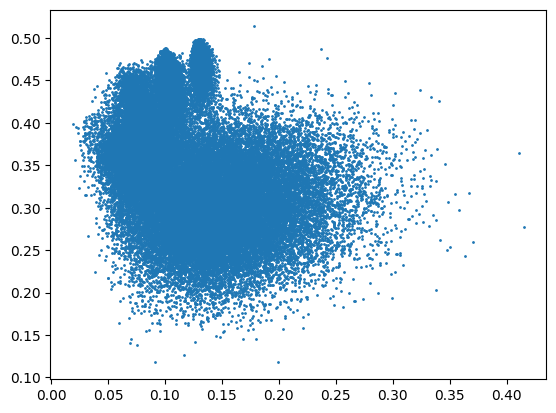

In [13]:
print(x_train)

plt.scatter(x_train[:,3],x_train[:,7], s=1)

### Autoencoder with raw distances 

In [30]:
from lammps import distances, neighbours, read_traj, nextN_neighbours
from scipy.spatial.distance import squareform
import numpy as np 

nn=27


Natoms, Config, Box = read_traj("dense_liquid/1st_NN_cutoff_1.5/trajectory.lammpstrj")
x_train=[]
for ti in range(60, 90):
    dist = distances(Config[ti]*Box[ti], Box[ti])
    dist_squareform = squareform(dist)
    nextN = nextN_neighbours(Natoms, dist_squareform,nn)

    for id in range(len(Config[ti])):
        x_train.append(nextN[id])

x_test=[]
for ti in range(90, 100):
    dist = distances(Config[ti]*Box[ti], Box[ti])
    dist_squareform = squareform(dist)
    nextN = nextN_neighbours(Natoms, dist_squareform,nn)

    for id in range(len(Config[ti])):
        x_test.append(nextN[id])
      
Natoms, Config, Box = read_traj("quickanddirty_freeze/1st_NN_cutoff_1.5/trajectory.lammpstrj")
for ti in range(0, 30):
    dist = distances(Config[ti]*Box[ti], Box[ti])
    dist_squareform = squareform(dist)
    nextN = nextN_neighbours(Natoms, dist_squareform,nn)

    for id in range(len(Config[ti])):
        x_train.append(nextN[id])
    
for ti in range(30, 40):
    dist = distances(Config[ti]*Box[ti], Box[ti])
    dist_squareform = squareform(dist)
    nextN = nextN_neighbours(Natoms, dist_squareform,nn)

    for id in range(len(Config[ti])):
        x_test.append(nextN[id])

x_train = np.array(x_train)
x_test = np.array(x_test)

encoded_imgs, decoded_imgs = autoencoder(2,nn,x_test,x_train)





ValueError: could not broadcast input array from shape (12,) into shape (27,)

[[1.2071495e+00 1.4520951e+01 0.0000000e+00 1.1871997e+00]
 [7.5881433e-01 1.2999881e+01 0.0000000e+00 7.7598083e-01]
 [1.6649365e+00 1.5173485e+01 0.0000000e+00 1.4583145e+00]
 ...
 [0.0000000e+00 1.0332730e+01 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0031122e+01 0.0000000e+00 1.5239149e-02]
 [2.1786451e-02 1.0572051e+01 0.0000000e+00 1.4194220e-02]]
(20000, 4)
20000


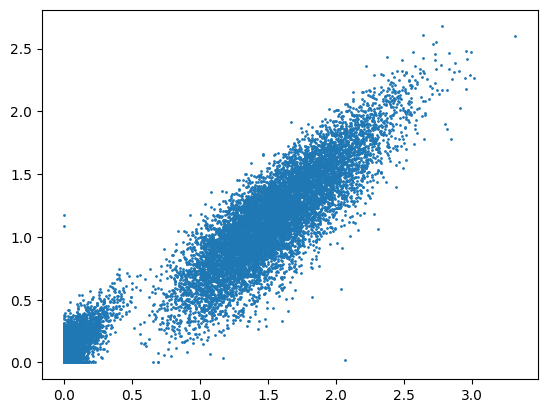

In [27]:

import matplotlib.pyplot as plt
print(encoded_imgs)
print(encoded_imgs.shape)
print(len(encoded_imgs))
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,3], s=1)
plt.show()


In [28]:
X_embedded = TSNE(n_components=2, learning_rate='auto',

                  init='random', perplexity=3).fit_transform(x_train)

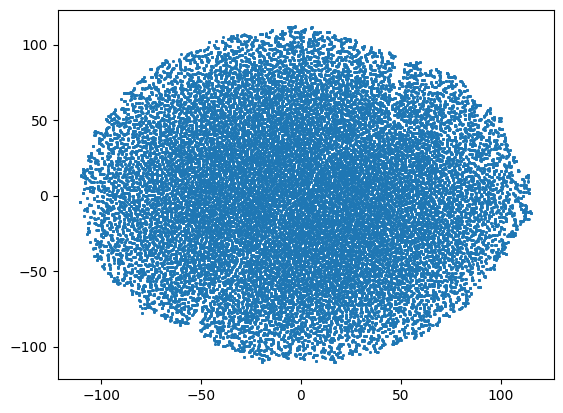

In [29]:
import matplotlib.pyplot as plt 
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=1)